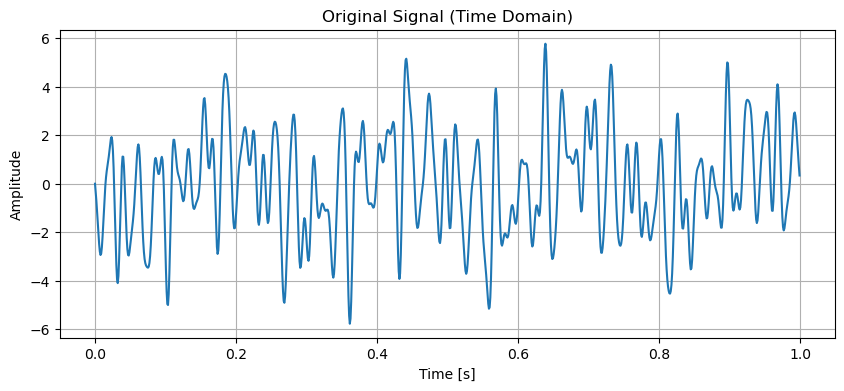

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1024  # Sampling frequency (Hz)
T = 1.0    # Duration (seconds)
N = int(fs * T)  # Number of samples
t = np.linspace(0, T, N, endpoint=False)  # Time array

# Generate a signal with multiple frequencies
k=10
#f1, f2, f3 = 50, 150, 300  # Frequencies in Hz
# sample  k frequencies between 1 and 500
# and generate a signal with these frequencies
frequencies = np.random.randint(1, 100, k)
amplitudes = np.random.randn(k)
signal = amplitudes[0] * np.sin(2 * np.pi * frequencies[0] * t)
for i in range(1, k):
    signal += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t)
# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title("Original Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [ ]:
522289 80NSSC22K0598


[ 0.  1.  2. ... -3. -2. -1.]


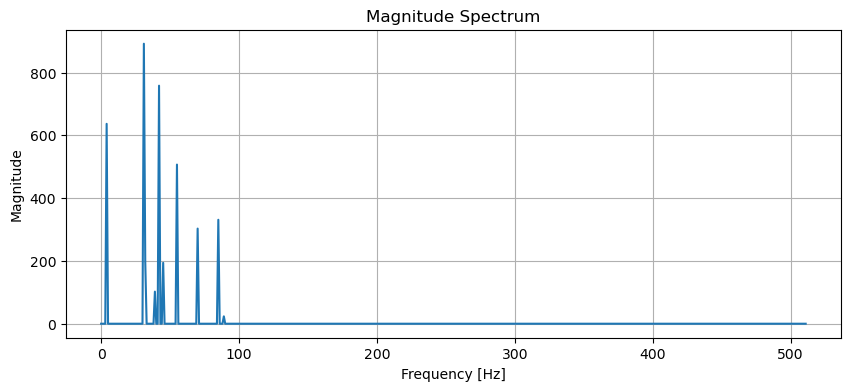

[70  4 55 42 39 32 89 45 31 85]
511.0


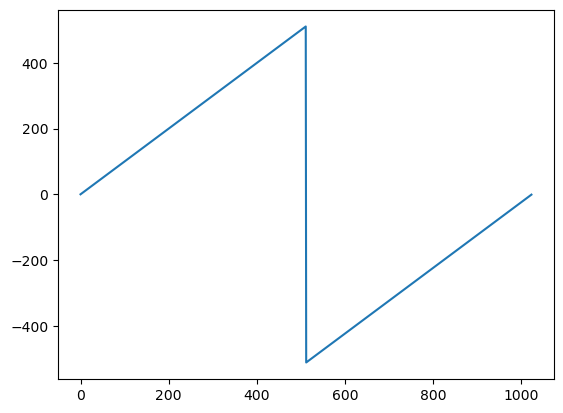

In [10]:
freqs = np.fft.fftfreq(N, 1/fs)  # Frequency axis
fft_vals = np.fft.fft(signal)  # Compute FFT
print(freqs)
# Plot Magnitude Spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs[:N//2], np.abs(fft_vals[:N//2]))  # Plot only positive frequencies
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()
plt.show()
print(frequencies)
plt.figure()
plt.plot(freqs)
print(freqs.max())

In the FFT the first N/2 entries are associated with $k/N*f_s$ (where fs is the sampling frequency) and the second half of the entries are associated with $(k-N)/N*f_s$. This is because the FFT assumes that the signal is periodic and the second half of the FFT is the negative frequency components.

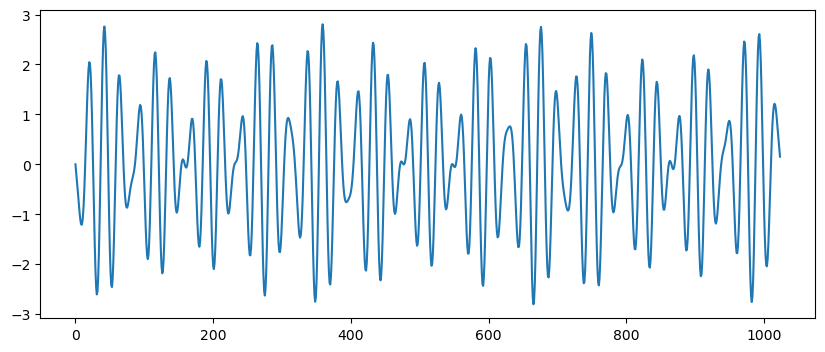

In [12]:
plt.figure(figsize=(10, 4))
fft_vals = np.fft.fft(signal)

# Band-pass filter settings
lowcut, highcut = 40, 60  # Passband range in Hz

# Create a mask to keep only the desired frequencies
mask = (np.abs(freqs) >= lowcut) & (np.abs(freqs) <= highcut)
filtered_fft = fft_vals * mask  # Zero out unwanted frequencies

filtered_signal = np.fft.ifft(filtered_fft).real  # Inverse FFT
plt.plot(filtered_signal)